Nama    : Mochamad Yuda Trinurais

Kelas   : Visioner

## Implementasi Algoritma Decission Tree

Decision tree merupakan metode non parametrik yang digunakan untuk klasifikasi dan regresi. Tujuan dari decision tree adalah membuat model yang memprediksi nilai variabel target dengan mengikuti aturan keputusan sederhana dari fitur data yang tersedia.

In [1]:
from IPython.display import Image
Image(filename='ML_01.png')

FileNotFoundError: [Errno 2] No such file or directory: 'ML_01.png'

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [5]:
df.shape

(1728, 7)

In [6]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
# membuat nama untuk setiap kolom
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:xlabel='class', ylabel='count'>

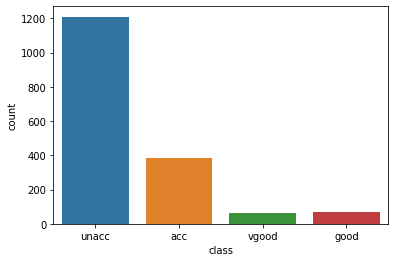

In [9]:
sns.countplot(df['class'])

<AxesSubplot:xlabel='buying', ylabel='count'>

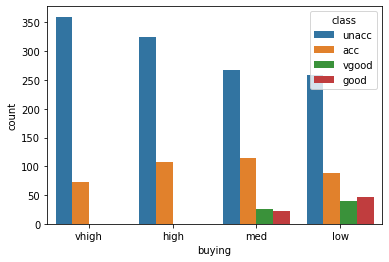

In [10]:
sns.countplot(x='buying', hue='class', data=df)

<AxesSubplot:xlabel='maint', ylabel='count'>

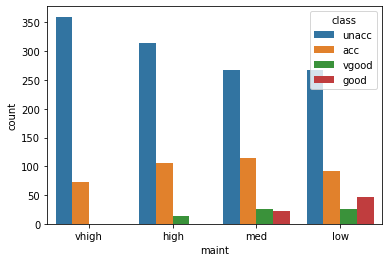

In [11]:
sns.countplot(x='maint', hue='class', data=df)

<AxesSubplot:xlabel='doors', ylabel='count'>

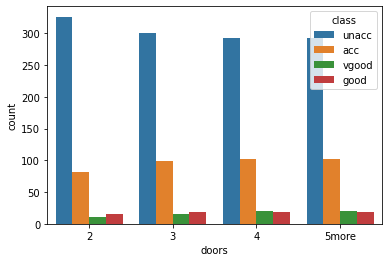

In [12]:
sns.countplot(x='doors', hue='class', data=df)

<AxesSubplot:xlabel='persons', ylabel='count'>

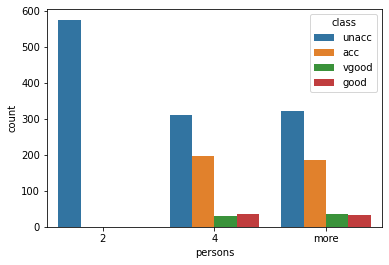

In [13]:
sns.countplot(x='persons', hue='class', data=df)

<AxesSubplot:xlabel='lug_boot', ylabel='count'>

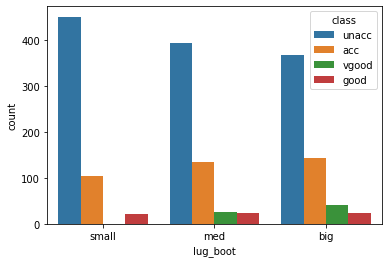

In [14]:
sns.countplot(x='lug_boot', hue='class', data=df)

<AxesSubplot:xlabel='safety', ylabel='count'>

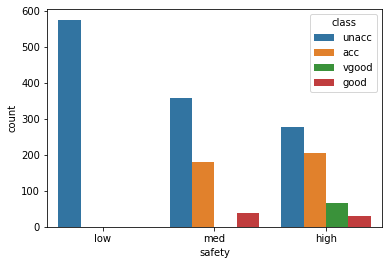

In [15]:
sns.countplot(x='safety', hue='class', data=df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


karena tipe data setiap kolom untuk memproses machine learning harus berupa numerik, maka harus ubah dulu dengan encode

In [8]:
import category_encoders as ce

In [9]:
encoder = ce.OrdinalEncoder(cols=col_names)

df = encoder.fit_transform(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


In [21]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4
1727,4,4,4,3,3,3,3


In [22]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

bagi dataframe menjadi 2 jenis, yaitu data feature dan data target

In [10]:
X = df.drop(['class'], axis=1)

y = df['class']

In [24]:
# split data feature dan target menjadi 70% untuk train dan 30% untuk test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [25]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [16]:
# dimensional reduction PCA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
hasil_variance = pca.explained_variance_ratio_

In [27]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=12, random_state=0)

In [28]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2,
       3, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4,
       3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 4, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9692


In [30]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([3, 1, 2, ..., 2, 1, 2])

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9692


In [33]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

In [34]:
y_pred_en = clf_en.predict(X_test)
y_pred_en

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 2, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2,
       3, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4,
       3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 4, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9750


In [36]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([3, 1, 2, ..., 2, 1, 2])

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [38]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9750


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[358   0   0   0]
 [  3 109   0   6]
 [  0   3  21   0]
 [  0   1   0  18]]


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       358
           2       0.96      0.92      0.94       118
           3       1.00      0.88      0.93        24
           4       0.75      0.95      0.84        19

    accuracy                           0.97       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.98      0.97      0.98       519



# perbandingan

perbedaan dari program contoh dengan program ini:
- tingkat akurasinya, pada pengolahan data pada program contoh dilakukan split data dulu baru encode data katakter ke numerik, sedangkan program ini melakukan encode data dulu baru di split data menjadi data train dan test

- split data dimana pada program contoh displit menjadi 33,33% data test dan 67,77% data train, sedangkan pada program ini menjadi 30% data test dan 70% data train

- nilai kedalaman maksimal model pada program contoh adalah 3, sedangkan pada program ini adalah 12

dengan perbedaan tersebut membuat tingkat akurasi terbaik pada program contoh adalah 80%, sedangkan tingkat akurasi pada program ini mencapai 97%. Jadi model pada program ini lebih baik daripada model program contoh.

# kesimpulan

Pada saat melakukan proses implementasi algoritma decission tree, melakukan data preeprocessing merupakan hal yang harus diperhatikan, jadi sebelum melakukan split data diharuskan data tersebut harus baik, contohnya : 
- tipe data semua feature dan target dalam bentuk numerik
- tidak ada data yang NULL
- semua feature ada hubungannya dengan target
- dan lain lain